# Análise Exploratória de Dados

Levantamento de algumas informações e dados sobre veículos usados na Alemanha que estavam à venda no eBay, com foco na exibição dos resultados através de gráficos.

In [2]:
# Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "white")
%matplotlib inline

In [3]:
# Dataset
clean_data_path = "autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

In [4]:
# Visualização Inicial do Dataset
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [5]:
# Verificando o nome das colunas
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

## 1. Distribuição dos Veículos com base no Ano de Registro

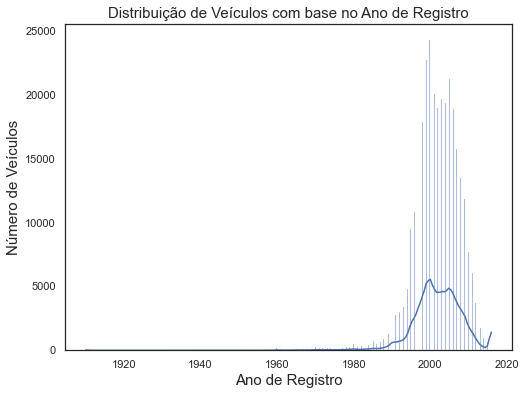

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df['yearOfRegistration'], kde=True, ax=ax)
ax.set_title('Distribuição de Veículos com base no Ano de Registro', fontsize=15)
plt.ylabel('Número de Veículos', fontsize=15)
plt.xlabel('Ano de Registro', fontsize=15)
plt.show()

## 2. Variação da Faixa de Preço pelo Tipo de Veículo

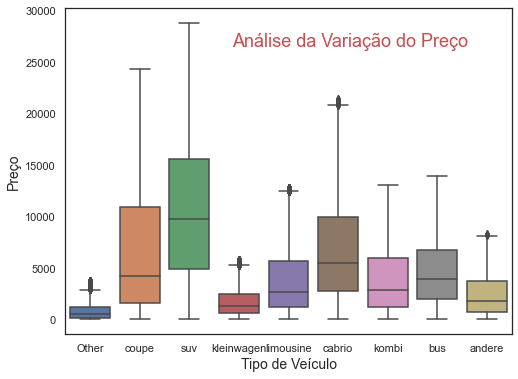

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='vehicleType', y='price', data=df)
ax.text(5.25, 27000, 'Análise da Variação do Preço', fontsize=18, color='r', ha='center', va='center')
ax.xaxis.set_label_text('Tipo de Veículo', fontdict={'size':14})
ax.yaxis.set_label_text('Preço', fontdict={'size':14})
plt.show()

## 3. Número de Veículos à Venda por Tipo de Veículo

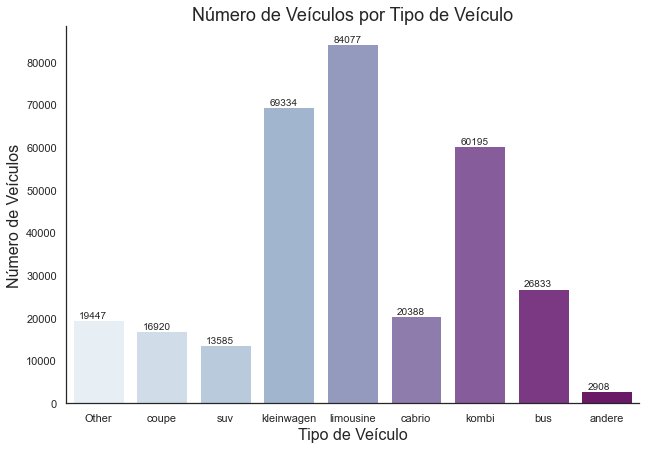

In [8]:
g = sns.catplot(x='vehicleType', data=df, kind='count', palette='BuPu', height=6, aspect=1.5)
g.ax.xaxis.set_label_text('Tipo de Veículo', fontdict={'size':16})
g.ax.yaxis.set_label_text('Número de Veículos', fontdict={'size':16})
g.ax.set_title('Número de Veículos por Tipo de Veículo', fontdict={'size':18})
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

## 4. Número de Veículos por Marca

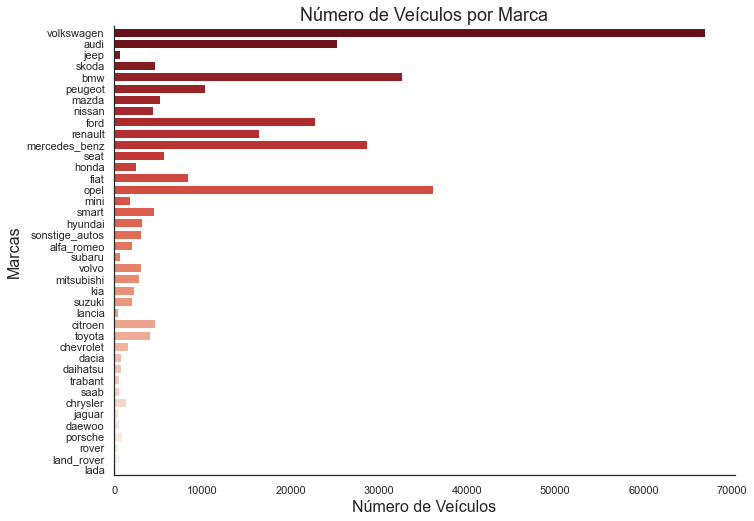

In [9]:
g = sns.catplot(y='brand', data=df, kind='count', palette='Reds_r', height=7, aspect=1.5)
g.ax.set_title('Número de Veículos por Marca', fontdict={'size':18})
g.ax.xaxis.set_label_text('Número de Veículos', fontdict={'size':16})
g.ax.yaxis.set_label_text('Marcas', fontdict={'size':16})
plt.show()

## 5. Preço Médio dos Veículos por Tipo de Veículo e Tipo de Câmbio

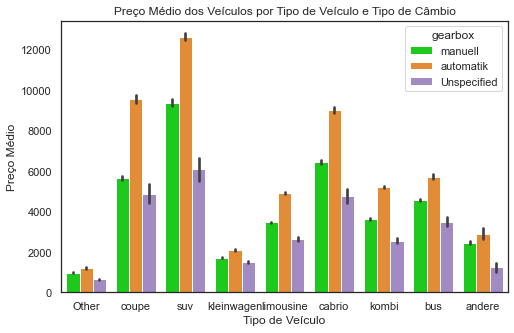

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ['#00e600', '#ff8c1a', '#a180cc']
sns.barplot(x='vehicleType', y='price', hue='gearbox', palette=colors, data=df)
ax.set_title('Preço Médio dos Veículos por Tipo de Veículo e Tipo de Câmbio')
ax.xaxis.set_label_text('Tipo de Veículo', fontdict={'size':12})
ax.yaxis.set_label_text('Preço Médio', fontdict={'size':12})
plt.show()

## 6. Preço Médio dos Veículos por Tipo de Combustível e Tipo de Câmbio

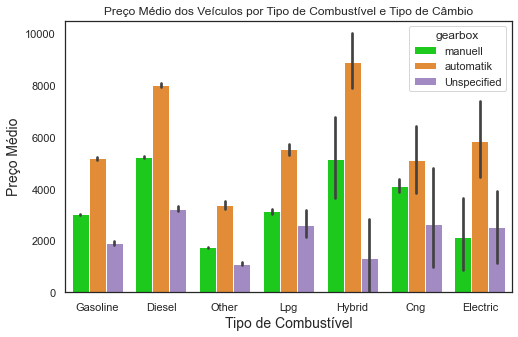

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='fuelType', y='price', hue='gearbox', palette=colors, data=df)
ax.set_title('Preço Médio dos Veículos por Tipo de Combustível e Tipo de Câmbio')
ax.xaxis.set_label_text('Tipo de Combustível', fontdict={'size':14})
ax.yaxis.set_label_text('Preço Médio', fontdict={'size': 14})
plt.show()

## 7. Potência Média dos Veículos por Tipo de Veículo e Tipo de Câmbio

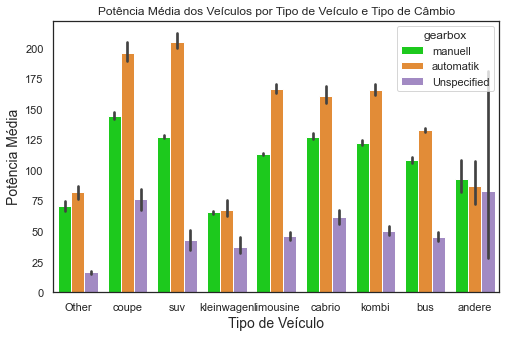

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='vehicleType', y='powerPS', hue='gearbox', palette=colors, data=df)
ax.set_title('Potência Média dos Veículos por Tipo de Veículo e Tipo de Câmbio')
ax.xaxis.set_label_text('Tipo de Veículo', fontdict={'size':14})
ax.yaxis.set_label_text('Potência Média', fontdict={'size': 14})
plt.show()

## 8. Preço Médio dos Veículos por Marca e por Tipo de Veículo

In [13]:
trial = df[['price', 'brand', 'vehicleType']].groupby(['brand', 'vehicleType']).mean().reset_index()
trial.head()

,brand,vehicleType,price
0,alfa_romeo,Other,669.805556
1,alfa_romeo,andere,962.500000
2,alfa_romeo,cabrio,7035.727778
3,alfa_romeo,coupe,5265.458874
4,alfa_romeo,kleinwagen,1867.865248


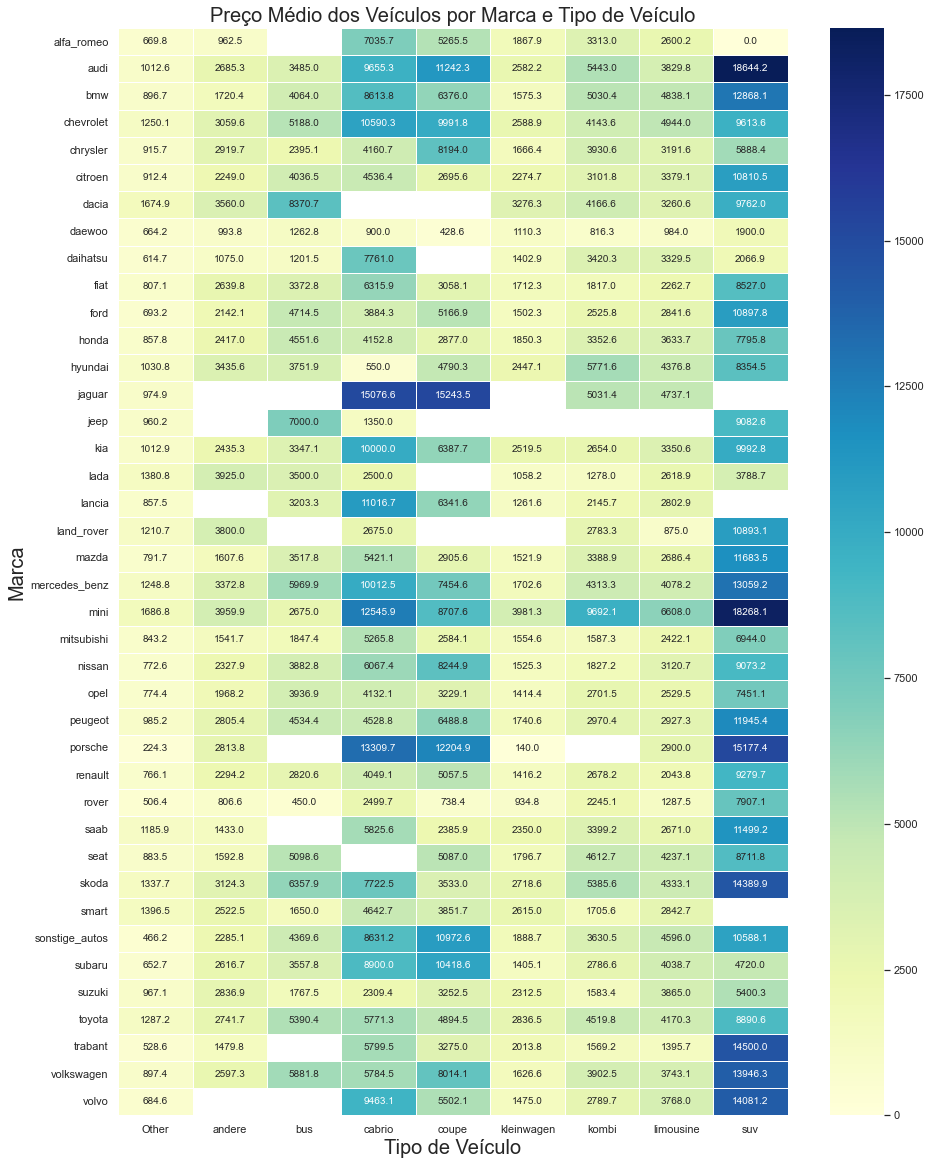

In [14]:
tri = trial.pivot('brand', 'vehicleType', 'price')
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri, linewidths=1, cmap='YlGnBu', annot=True, ax=ax, fmt='.1f')
ax.set_title('Preço Médio dos Veículos por Marca e Tipo de Veículo', fontdict={'size':20})
ax.xaxis.set_label_text('Tipo de Veículo', fontdict={'size':20})
ax.yaxis.set_label_text('Marca', fontdict={'size':20})
plt.show()